In [1]:
# Script Name: EDA of Hotel Reviews Data
# Author: Rahul Kumar
# Date: 2-Jan-20
# Description: The purpose is to clean up data in preperation for Model running

import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
import scipy as sp
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

#this supposedly extracts country from a text line
import pycountry

import matplotlib.pyplot as plt
%matplotlib inline

# This actually sets the pandas display to show all rows and columns 
# when you are showing a dataframe, without skipping the center
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
hotels = pd.read_csv('../Hotel_Reviews.csv')
hotels.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [3]:
# Initially do the usual shape stuff I guess. 
hotels.shape

(515738, 17)

In [4]:
# Check the data types for any odd onces
hotels.dtypes

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object

In [5]:
# Look for missing null values
hotels.isnull().sum().to_frame()

,0
Hotel_Address,0
Additional_Number_of_Scoring,0
Review_Date,0
Average_Score,0
Hotel_Name,0
Reviewer_Nationality,0
Negative_Review,0
Review_Total_Negative_Word_Counts,0
Total_Number_of_Reviews,0
Positive_Review,0


In [6]:
# Get average stats using describe. Not really sure how useful this was

hotels.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


In [7]:
# The number of hotels and the number of reviews they have.
hotels.groupby('Hotel_Name').mean()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
Hotel_Name,,,,,,,,,
11 Cadogan Gardens,101.000000,8.700000,15.528302,393.000000,19.974843,7.226415,8.845283,51.493616,-0.159235
1K Hotel,69.000000,7.700000,24.932432,663.000000,15.601351,9.141892,7.861486,48.863932,2.365874
25hours Hotel beim MuseumsQuartier,391.000000,8.800000,16.161103,4324.000000,21.911466,8.722787,8.983309,48.206474,16.354630
41,66.000000,9.600000,8.883495,244.000000,25.300971,6.009709,9.711650,51.498147,-0.143649
45 Park Lane Dorchester Collection,27.000000,9.400000,6.750000,68.000000,11.535714,7.214286,9.603571,51.506371,-0.151536
88 Studios,197.000000,8.400000,23.936819,955.000000,21.464052,7.427015,8.489107,51.499279,-0.209073
9Hotel Republique,100.000000,8.800000,16.950820,857.000000,19.338798,8.633880,8.743716,48.870842,2.360586
A La Villa Madame,24.000000,8.800000,8.463415,185.000000,19.634146,5.829268,8.853659,48.848861,2.331526
ABaC Restaurant Hotel Barcelona GL Monumento,10.000000,8.800000,35.225806,111.000000,18.677419,10.258065,8.464516,41.410694,2.136294


In [8]:
# Value Count for the Hotel Names. This would give an idea, perhaps to see if 
# a place has less than a certain number of reviews we can ignore it perhaps
hotels.Hotel_Name.value_counts()

Britannia International Hotel Canary Wharf                      4789
Strand Palace Hotel                                             4256
Park Plaza Westminster Bridge London                            4169
Copthorne Tara Hotel London Kensington                          3578
DoubleTree by Hilton Hotel London Tower of London               3212
Grand Royale London Hyde Park                                   2958
Holiday Inn London Kensington                                   2768
Hilton London Metropole                                         2628
Millennium Gloucester Hotel London                              2565
Intercontinental London The O2                                  2551
Park Grand Paddington Court                                     2288
Hilton London Wembley                                           2227
Park Plaza County Hall London                                   2223
Blakemore Hyde Park                                             2178
Park Plaza London Riverbank       

Text(0.5,1,'Content Ratings Spread')

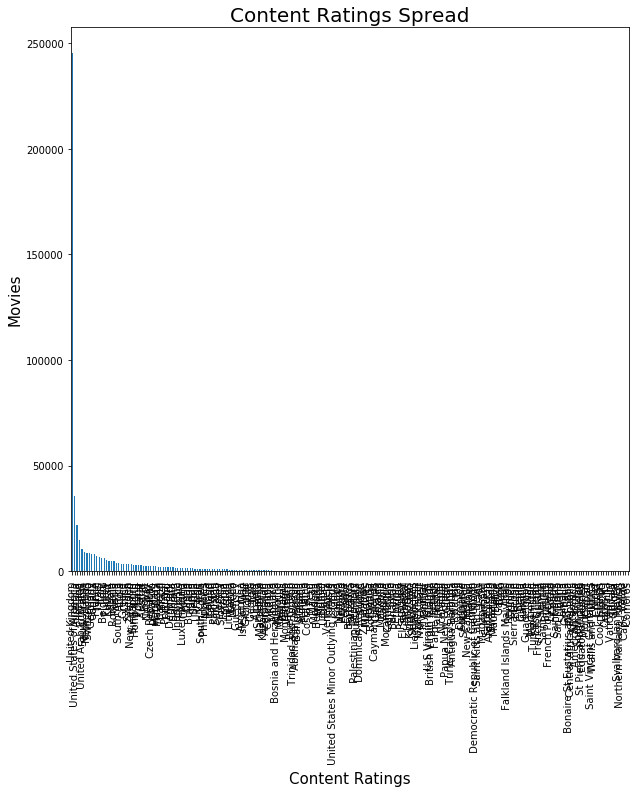

In [9]:
plt.figure(figsize=(10,10))

#Value Counts for Reviewer Nationality, as if the nationality is rare, we won't really get any meaningful information from it
hotels.Reviewer_Nationality.value_counts().plot.bar()

plt.xlabel('Content Ratings',fontsize=15)
plt.ylabel('Movies',fontsize=15)
plt.title('Content Ratings Spread',fontsize=20)

# The graph doesn't help much

In [10]:
# Lets split up the address and obtain the location of each hotel. without using the lat lon as there are values clearly
# missing from it.

# new dataframe

hotel_address = hotels[['Hotel_Address']]
hotel_address.head()

,Hotel_Address
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...


In [11]:
hotel_address['Hotel_Address'][50000]
#This was just checking to see if the data has the country in the address. It seems to be the last Word, Unless the country has
#a long name like United Kingdom

'140 Gloucester Road Kensington and Chelsea London SW7 4QH United Kingdom'

### Test to see if pycountry works

In [12]:

text = "140 Gloucester Road Kensington and Chelsea London SW7 4QH United Kingdom"
for country in pycountry.countries:
    if country.name in text:
        print(country.name)

United Kingdom


It's great the pycountry package works pretty well.

In [13]:
def country_txt(text):
    for country in pycountry.countries:
        if country.name in text:
            return country.name

In [14]:
# I used the apply method to apply the above function to each row
hotels['Country'] = hotels['Hotel_Address'].apply(country_txt)

In [15]:
hotels.head(30)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Country
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,Netherlands
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,Netherlands
5,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,Poland,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,6.7,"[' Leisure trip ', ' Group ', ' Duplex Double ...",10 days,52.360576,4.915968,Netherlands
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4.6,"[' Leisure trip ', ' Group ', ' Duplex Twin Ro...",17 days,52.360576,4.915968,Netherlands
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",17 days,52.360576,4.915968,Netherlands
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/9/2017,7.7,Hotel Arena,Belgium,Even though the pictures show very clean room...,34,1403,No Positive,0,3,6.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",25 days,52.360576,4.915968,Netherlands
9,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/8/2017,7.7,Hotel Arena,Norway,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,7.9,"[' Leisure trip ', ' Couple ', ' Large King Ro...",26 days,52.360576,4.915968,Netherlands


In [16]:
hotels.dtypes

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
Country                                        object
dtype: object

In [17]:
# Look for missing null values
hotels.isnull().sum().to_frame()

,0
Hotel_Address,0
Additional_Number_of_Scoring,0
Review_Date,0
Average_Score,0
Hotel_Name,0
Reviewer_Nationality,0
Negative_Review,0
Review_Total_Negative_Word_Counts,0
Total_Number_of_Reviews,0
Positive_Review,0


Text(0.5,1,'Number of Hotels in a Country')

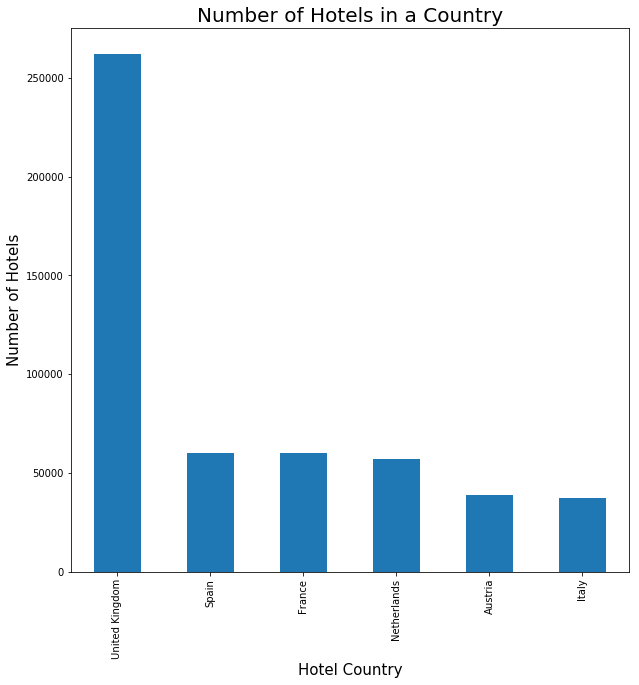

In [18]:
# The Lat and Lng at the moment dont seem to have much use, especially since it has a large amount of null values. The address
# has given us the general country of each hotel.

# Value Count for the Country.
plt.figure(figsize=(10,10))

#Value Counts for Reviewer Nationality, as if the nationality is rare, we won't really get any meaningful information from it
hotels.Country.value_counts().plot.bar()

plt.xlabel('Hotel Country',fontsize=15)
plt.ylabel('Number of Hotels',fontsize=15)
plt.title('Number of Hotels in a Country',fontsize=20)

# The graph doesn't help much

In [19]:
hotels.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Country
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,Netherlands
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,Netherlands


In [20]:
hotels_raw = hotels
hotels_raw.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Country
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,Netherlands
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,Netherlands


In [21]:
# At the moment, I can't see much use to the latitude and longitude when I have the address
hotels.drop(['lat', 'lng'], axis=1,inplace=True)
hotels.dtypes

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
Country                                        object
dtype: object

In [22]:
#Change Review Date to Datetime type
hotels['Review_Date'] = pd.to_datetime(hotels['Review_Date'])
hotels.dtypes

Hotel_Address                                         object
Additional_Number_of_Scoring                           int64
Review_Date                                   datetime64[ns]
Average_Score                                        float64
Hotel_Name                                            object
Reviewer_Nationality                                  object
Negative_Review                                       object
Review_Total_Negative_Word_Counts                      int64
Total_Number_of_Reviews                                int64
Positive_Review                                       object
Review_Total_Positive_Word_Counts                      int64
Total_Number_of_Reviews_Reviewer_Has_Given             int64
Reviewer_Score                                       float64
Tags                                                  object
days_since_review                                     object
Country                                               object
dtype: object

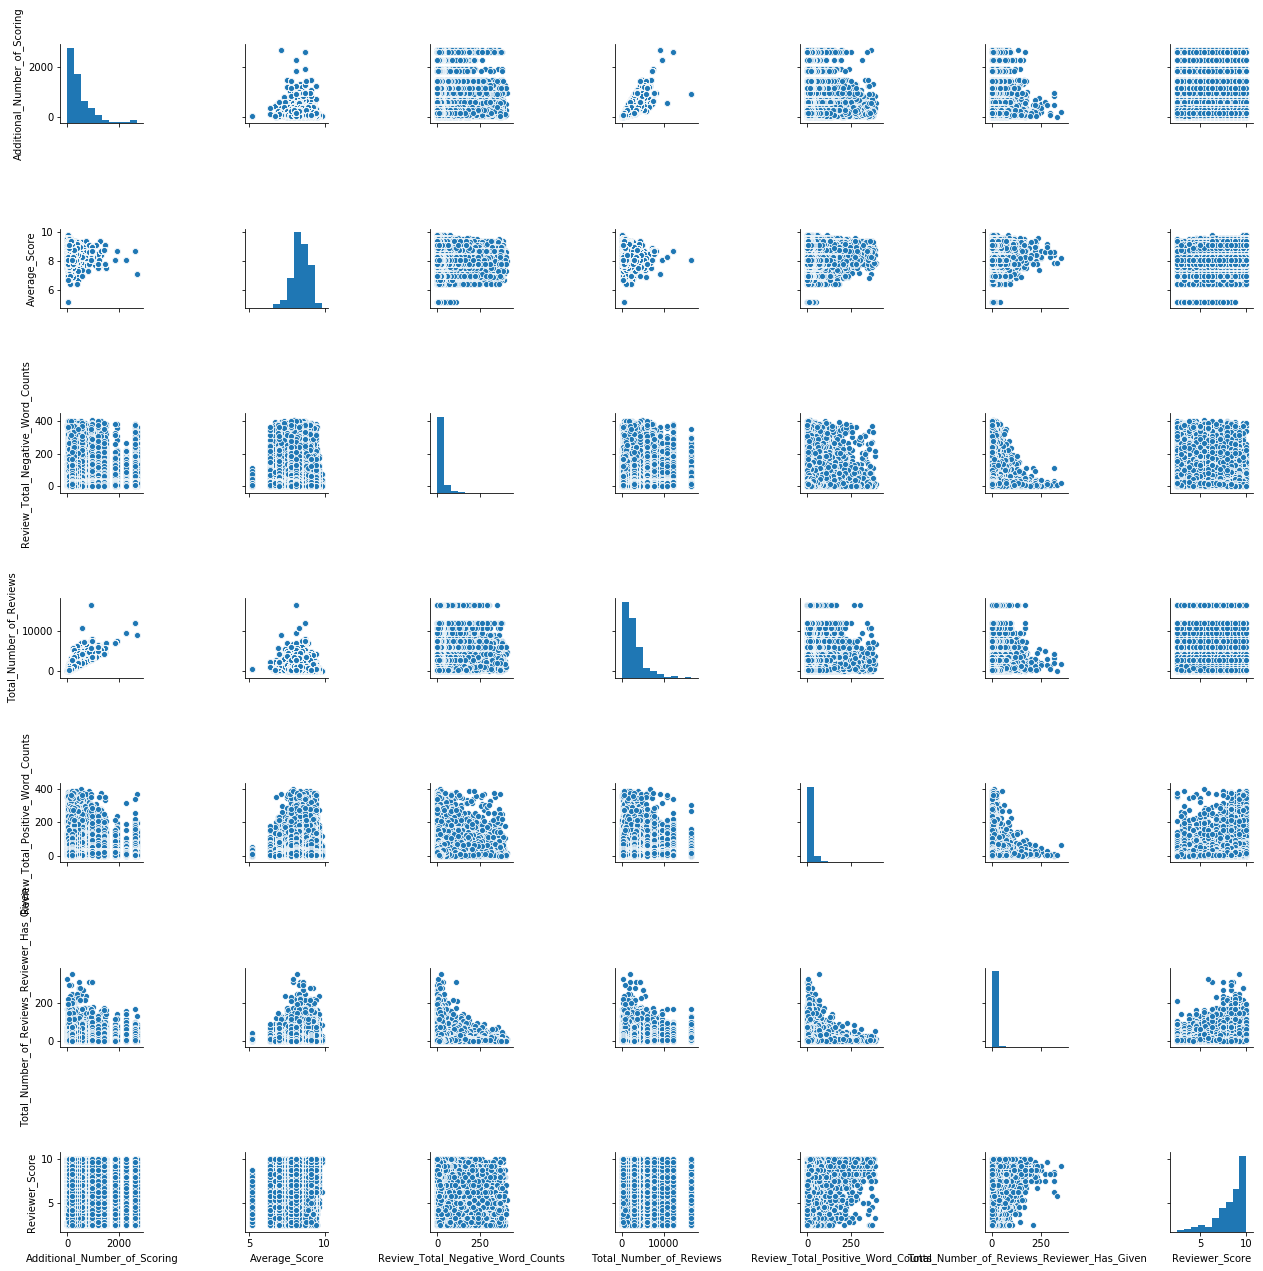

In [23]:
sns.pairplot(hotels)

<Figure size 1080x1080 with 0 Axes>

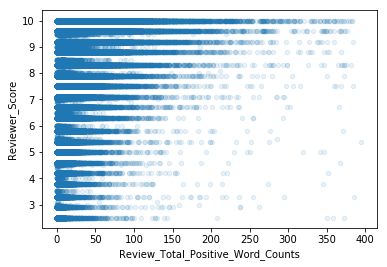

In [31]:
# Looking at relationships between word count and review score
plt.figure(figsize=(15,15))
hotels.plot(kind='scatter', x='Review_Total_Positive_Word_Counts', y='Reviewer_Score', alpha=0.1)

<Figure size 1080x1080 with 0 Axes>

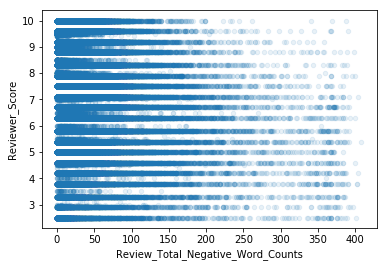

In [33]:
# Looking at relationship between word count and review score
plt.figure(figsize=(15,15))
hotels.plot(kind='scatter', x='Review_Total_Negative_Word_Counts', y='Reviewer_Score', alpha=0.1)

<Figure size 1080x1080 with 0 Axes>

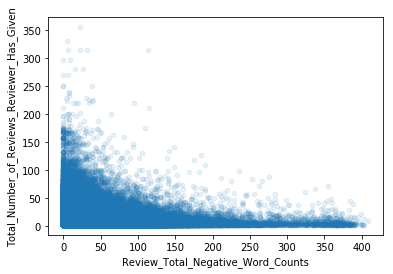

In [36]:
# Looking at relationship between word count and review score
plt.figure(figsize=(15,15))
hotels.plot(kind='scatter', x='Review_Total_Negative_Word_Counts', y='Total_Number_of_Reviews_Reviewer_Has_Given', alpha=0.1)

<Figure size 1080x1080 with 0 Axes>

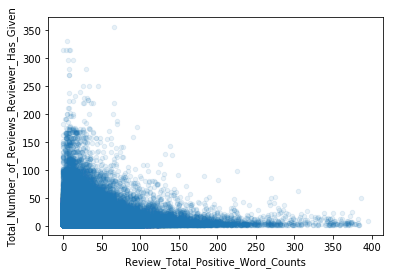

In [38]:
# Looking at relationship between word count and number of reviews
plt.figure(figsize=(15,15))
hotels.plot(kind='scatter', x='Review_Total_Positive_Word_Counts', y='Total_Number_of_Reviews_Reviewer_Has_Given', alpha=0.1)

<Figure size 1080x1080 with 0 Axes>

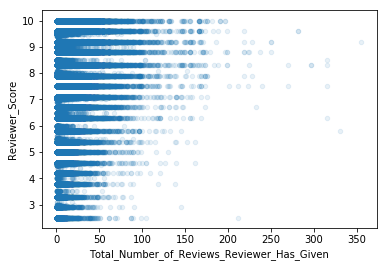

In [41]:
# Looking at relationship between word count and number of reviews
plt.figure(figsize=(15,15))
hotels.plot(kind='scatter', x='Total_Number_of_Reviews_Reviewer_Has_Given', y='Reviewer_Score', alpha=0.1)

<Figure size 1080x1080 with 0 Axes>

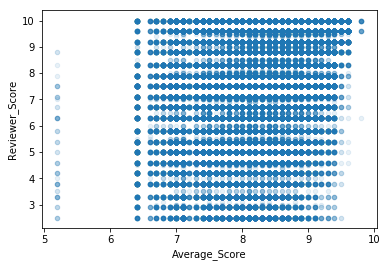

In [43]:
# Looking at relationship between average score and reviewer score
plt.figure(figsize=(15,15))
hotels.plot(kind='scatter', x='Average_Score', y='Reviewer_Score', alpha=0.1)

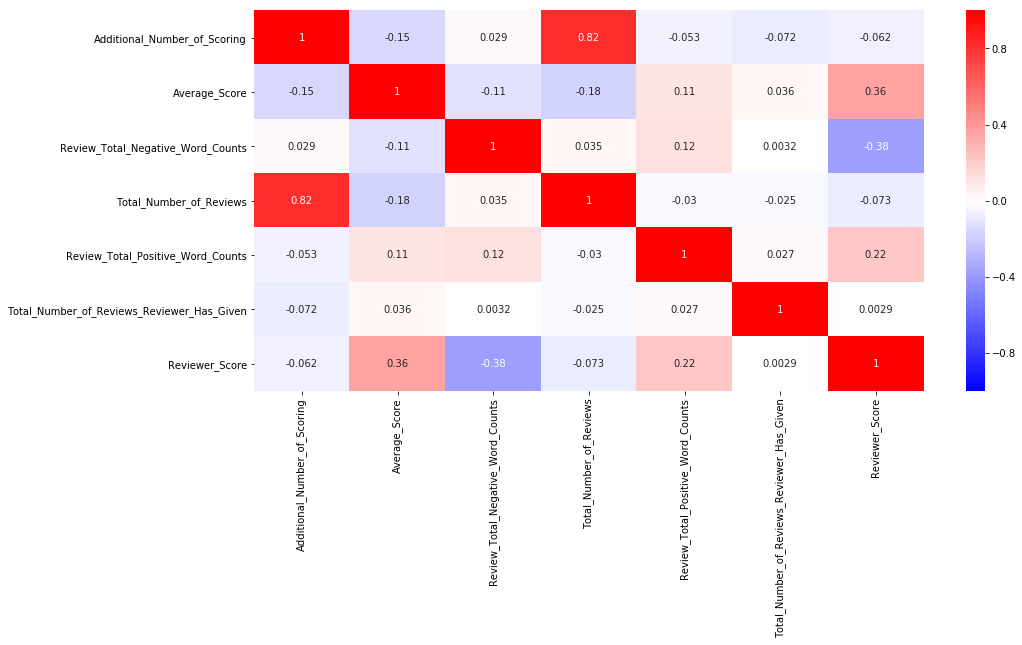

In [49]:
# Figured why not make a heatmap, its a lot more clearer than the sns pairplot, especially considering how much data 
# there actually is

# Make a heatmap on the correlations between variables in the hotel data:
hotels_correlations = hotels.corr()
hotels_correlations
plt.figure(figsize=(15,7))
sns.heatmap(hotels_correlations, vmin = -1, vmax = 1, cmap = 'bwr', annot=True);

# Yeah this is way more clearer